In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import markers
from math import sqrt

In [34]:
def attract(x,t,u, parameters={}):
    dx = np.zeros((1,))
    dx[0] = x[0]*x[0]+u
    return dx

In [35]:
initial=np.array([1])      
final=np.array([1])

In [36]:
K = np.matrix([3])
u0 = np.matrix([-1])
def controller(x, ref):
    cin = (u0-K @ (x - ref))[0,0]
    return cin

In [37]:
#lqr
# Time interval
t = np.linspace(0,10,500)
# Store results for plotting 
u = np.zeros(len(t))

# control limit
op_hi = 100
op_lo = -100

x0 = initial
res1 =np.ones(len(t))
res1[0] = initial[0]

In [38]:
for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    u[i+1] = controller(x0, final)
    print(u[i+1])
    if u[i+1]>op_hi:
        u[i+1] = op_hi
    elif u[i+1]<op_lo:
        u[i+1] = op_lo
    y = odeint(attract, x0, ts, args=(u[i+1],))
    res1[i+1]=y[-1][0]
    x0 = y[-1]

-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


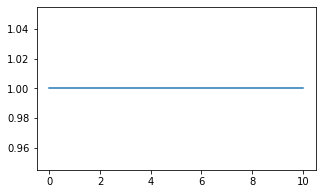

In [39]:
fig, ax = plt.subplots(figsize=(5, 3))
# ax.set_ylim(79,83)
# ax.set_xlim(7.8,10)
ax.plot(t,res1)

In [40]:
#bias_attack
t = np.linspace(0,10,500)
# Store results for plotting 
u = np.zeros(len(t))
initial=np.array([1])      
final=np.array([1])
# control limit
op_hi = 100
op_lo = -100

x0 = initial
res1 =np.ones(len(t))
res2= np.ones(len(t))
res1[0] = initial[0]
t = np.linspace(0,10,500)
# Store results for plotting 
threshold = 1
x0 = initial
for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    u[i+1] = controller(x0, final)
    if i>399:
        u[i+1]=controller(x0-threshold/100, final)
    if u[i+1]>op_hi:
        u[i+1] = op_hi
    elif u[i+1]<op_lo:
        u[i+1] = op_lo
    y = odeint(attract, x0, ts, args=(u[i+1],))
    res1[i+1]=y[-1][0]
    x0 = y[-1]

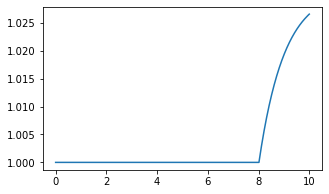

In [41]:
fig, ax = plt.subplots(figsize=(5, 3))
# ax.set_ylim(79,83)
# ax.set_xlim(7.8,10)
ax.plot(t,res1)
bias1 = res1.copy()

In [42]:
#surge_attack
t = np.linspace(0,10,500)
# Store results for plotting 
u = np.zeros(len(t))
initial=np.array([1])      
final=np.array([1])
# control limit
op_hi = 100
op_lo = -100

x0 = initial
res1 =np.ones(len(t))
res2= np.ones(len(t))
res1[0] = initial[0]
t = np.linspace(0,10,500)
# Store results for plotting 
threshold = 1
x0 = initial
for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    u[i+1] = controller(x0, final)
    if i==400:
        u[i+1]=controller(x0-threshold, final)
    if u[i+1]>op_hi:
        u[i+1] = op_hi
    elif u[i+1]<op_lo:
        u[i+1] = op_lo
    y = odeint(attract, x0, ts, args=(u[i+1],))
    res1[i+1]=y[-1][0]
    x0 = y[-1]

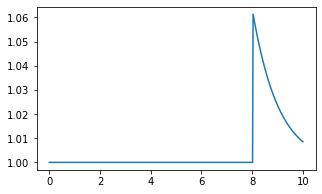

In [43]:
fig, ax = plt.subplots(figsize=(5, 3))
# ax.set_ylim(79,83)
# ax.set_xlim(7.8,10)
ax.plot(t,res1)
surge1 = res1.copy()

In [44]:
t = np.linspace(0,10,500)
# Store results for plotting 
u = np.zeros(len(t))
initial=np.array([1])      
final=np.array([1])
# control limit
op_hi = 100
op_lo = -100
alpha=0.7
beta=0.6
x0 = initial
res1 =np.ones(len(t))
res2= np.ones(len(t))
res1[0] = initial[0]
t = np.linspace(0,10,500)
# Store results for plotting 
threshold = 1
x0 = initial
for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    u[i+1] = controller(x0, final)
    if i>399:
        attack = beta*(alpha**(500-i))
        u[i+1]=controller(x0-attack, final)
    if u[i+1]>op_hi:
        u[i+1] = op_hi
    elif u[i+1]<op_lo:
        u[i+1] = op_lo
    y = odeint(attract, x0, ts, args=(u[i+1],))
    res1[i+1]=y[-1][0]
    x0 = y[-1]

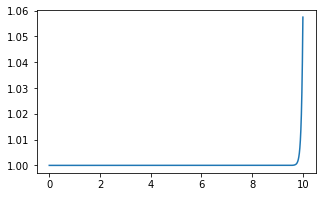

In [45]:
fig, ax = plt.subplots(figsize=(5, 3))
# ax.set_ylim(79,83)
# ax.set_xlim(7.8,10)
ax.plot(t,res1)
geo1 = res1.copy()

<ipython-input-46-783ad9b90c1f>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


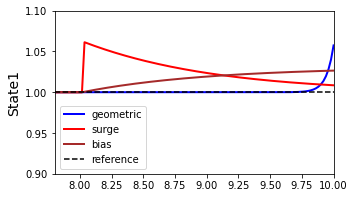

In [46]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_ylim(0.9,1.1)
ax.set_xlim(7.8,10)
ax.plot(t,geo1,label='geometric', color = 'blue',linewidth=2)
# ax.plot(a.t_arr, geo_2,label='geometric attack_2', color = 'r')
# ax.plot(a.t_arr, geo_3,label='geometric attack_3',color = 'brown')
ax.plot(t,surge1,label='surge', color = 'r',linewidth=2)
ax.plot(t,bias1,label='bias', color = 'brown',linewidth=2)
# ax.plot(a.t_arr, optimal_result,label='optimal',color = 'Orange',linewidth=2,marker='v')
# ax.plot(a.t_arr, measures,label='measure', color = 'orange')
ax.plot(t,[1]*500,label='reference', color='black', ls='--')
# ax.axvline((a.place+2+k)*a.Ts, color='brown',label='stable')
ax.set_ylabel('State1', fontsize=14)
ax.legend()
fig.show()
# fig.savefig('vt_mot_1.pdf',bbox_inches='tight')
# fig.savefig('dc_safe_limit100.pdf',bbox_inches='tight')
# fig.savefig('vt_unsafe_thres.pdf',bbox_inches='tight')

In [47]:
import scipy.io
mat = scipy.io.loadmat("simple_opt.mat")
ned = mat['x'][0]
opt_attack = []
for i in range(100):
    opt_attack.append(ned[i])
# opt_attack = [-5]+[0.3424]+[-0.8639]+[-0.7769]+[0.001]*97

In [48]:
opt_attack

[0.10640897726564376,
 0.5857864414129736,
 0.5857861032011539,
 0.5857863180426661,
 0.5857862165295121,
 0.585786274572282,
 0.5857862422968797,
 0.5857862589508153,
 0.5857862482958205,
 0.5857862526320382,
 0.5857862486306086,
 0.5857862492043506,
 0.5857862472183003,
 0.5857862466179731,
 0.5857862452214833,
 0.5857862442348494,
 0.585786242989513,
 0.5857862418555193,
 0.5857862406252627,
 0.585786239415414,
 0.5857862381566981,
 0.5857862368907071,
 0.5857862355880424,
 0.5857862342695521,
 0.585786232915925,
 0.5857862315439272,
 0.5857862301343806,
 0.5857862287061953,
 0.5857862272359403,
 0.5857862257479383,
 0.5857862242130779,
 0.5857862226591268,
 0.5857862210579314,
 0.5857862194292437,
 0.5857862177584293,
 0.5857862160513458,
 0.5857862143022586,
 0.5857862125118183,
 0.5857862106773922,
 0.5857862087973432,
 0.5857862068699105,
 0.5857862048928065,
 0.5857862028640956,
 0.5857862007813623,
 0.5857861986421803,
 0.5857861964441305,
 0.5857861941839961,
 0.5857861918594

In [49]:
#opt_attack
t = np.linspace(0,10,500)
# Store results for plotting 
u = np.zeros(len(t))
initial=np.array([0])      
final=np.array([1])
# control limit
op_hi = 100
op_lo = -100
x0 = initial
res1 =np.ones(len(t))
res1[0] = initial[0]
t = np.linspace(0,10,500)
# Store results for plotting 
threshold = 1
x0 = initial
for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    u[i+1] = controller(x0, final)
    if i>399:
        u[i+1]=controller(opt_attack[(i-400)], final)
    if u[i+1]>op_hi:
        u[i+1] = op_hi
    elif u[i+1]<op_lo:
        u[i+1] = op_lo
    y = odeint(attract, x0, ts, args=(u[i+1],))
    res1[i+1]=y[-1][0]
    x0 = y[-1]

D:\Anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<ipython-input-50-489ba02b4896>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


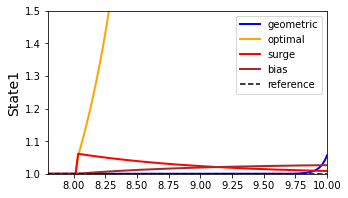

In [50]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_ylim(1,1.5)
ax.set_xlim(7.8,10)
ax.plot(t,geo1,label='geometric', color = 'blue',linewidth=2)
ax.plot(t,res1,label='optimal', color = 'orange',linewidth=2)
# ax.plot(a.t_arr, geo_2,label='geometric attack_2', color = 'r')
# ax.plot(a.t_arr, geo_3,label='geometric attack_3',color = 'brown')
ax.plot(t,surge1,label='surge', color = 'r',linewidth=2)
ax.plot(t,bias1,label='bias', color = 'brown',linewidth=2)
# ax.plot(a.t_arr, optimal_result,label='optimal',color = 'Orange',linewidth=2,marker='v')
# ax.plot(a.t_arr, measures,label='measure', color = 'orange')
ax.plot(t,[1]*500,label='reference', color='black', ls='--')
# ax.axvline((a.place+2+k)*a.Ts, color='brown',label='stable')
ax.set_ylabel('State1', fontsize=14)
ax.legend()
fig.show()
# fig.savefig('vt_mot_1.pdf',bbox_inches='tight')
# fig.savefig('dc_safe_limit100.pdf',bbox_inches='tight')
# fig.savefig('vt_unsafe_thres.pdf',bbox_inches='tight')

In [51]:
surge1[399:409]

array([1.        , 1.        , 1.0613665 , 1.06018724, 1.05902922,
       1.0578921 , 1.05677556, 1.05567929, 1.05460295, 1.05354625])

In [52]:
res1[399:409]

array([0.99986872, 0.99987141, 1.05470018, 1.08244247, 1.1114151 ,
       1.14170776, 1.17341913, 1.20665786, 1.24154402, 1.27821052])